## 1. Exploratory Data Analysis

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with.

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# additional modules imported
import seaborn as sns
import math

In [2]:
# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 1.1. Visualising the data
The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand. When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features.

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises.

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.

You should create a function that, given data X and labels y, plots this grid. The function should be invoked something like this:

    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this.

In [3]:
# define plotting function

def myplotGrid(X,y):
    """Plots a visualization grid comparing the relationship between the different features. 
    Takes (X,y) as an input."""
    
    df = pd.DataFrame(X,columns=selected_features)
    df['target']=wine.target
    
    # calling the constructor sets up a blank grid of subplots
    g = sns.PairGrid(df, hue="target", palette="pastel") 
    # determining the type of plot for the sub-grids on the diagonal line of the entire plot
    g.map_diag(sns.kdeplot)
    # determining the type of plot for the sub-grids not on the diagonal line of the entire plot
    g.map_offdiag(sns.scatterplot)
    # adds a legend to show the different classes
    g.add_legend()

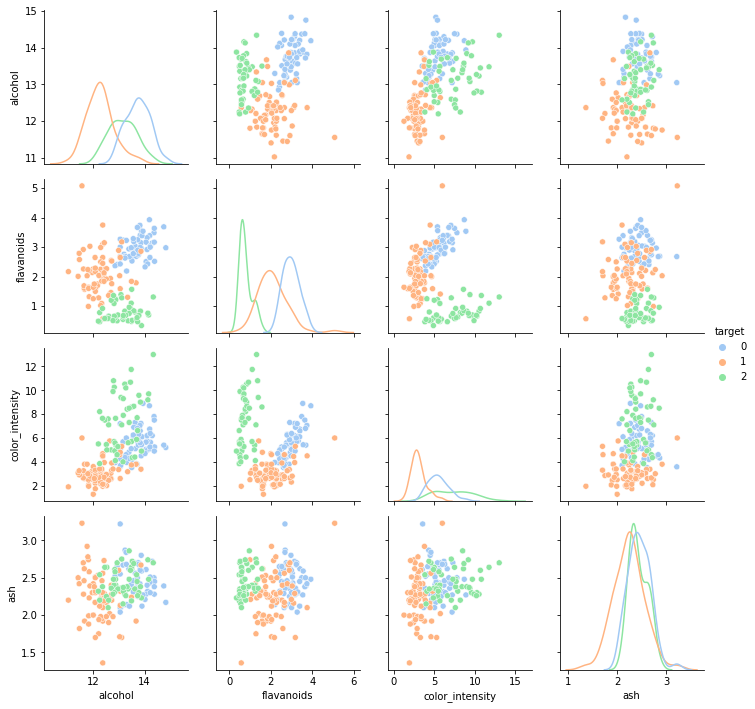

In [4]:
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise
When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)

and then invoke

    myplotGrid(XN,y)

In [5]:
# noise code

# initialize random seed to replicate results over different runs
mySeed = 12345 
np.random.seed(mySeed) 
# add the noise to the data points in X
XN=X+np.random.normal(0,0.6,X.shape)

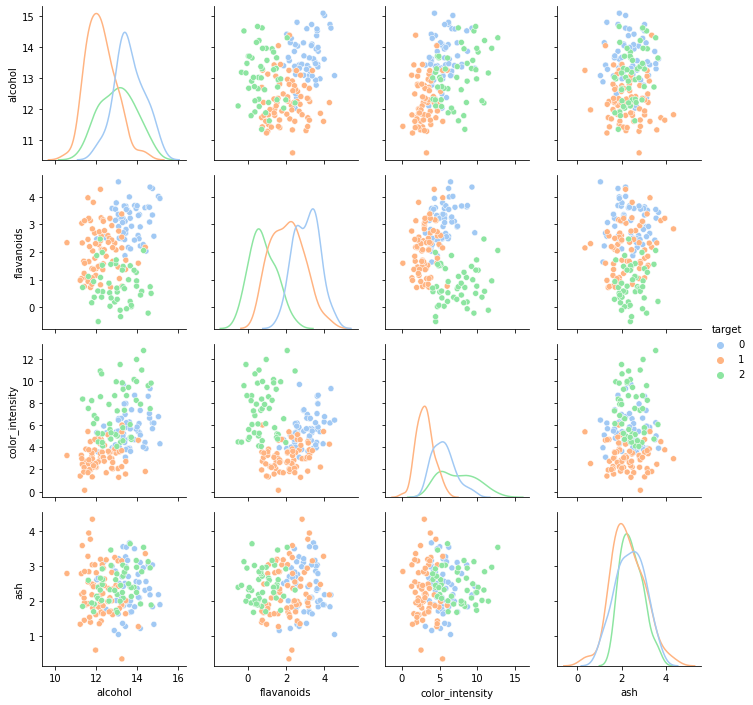

In [6]:
myplotGrid(XN,y)

In [7]:
# compute pairwise correlation of columns, excluding NA/null values.

df_wine[selected_features].corr()

,alcohol,flavanoids,color_intensity,ash
alcohol,1.000000,0.236815,0.546364,0.211545
flavanoids,0.236815,1.000000,-0.172379,0.115077
color_intensity,0.546364,-0.172379,1.000000,0.258887
ash,0.211545,0.115077,0.258887,1.000000


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why? Answer as fully as you can.

**Answer:** If only two features can be chosen, I would choose to use *Alcohol* and *Flavanoids*. This is due to the fact that the data points bewtween these two classifiers has the least overlaps between the three classes, which ensures a more accurate training of our model and prevent overfitting and thus better usability and accurate results.

### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise?

**Answer:** With the added Gaussian noise, the data points are more evenly spread out and does not overlap each other as much. This also prevents the model from overfitting and being too specific to our dataset, and becoming unusable with other datasets.

## 2. Implementing kNN
In the cell below, develop your own code for performing k-Nearest Neighbour classification. You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions.

Define a function that performs k-NN given a set of data. Your function should be invoked similary to:

    y_ = mykNN(X,y,X_,options)

where X is your training data, y is your training outputs, X_ are your testing data and y_ are your predicted outputs for X_. The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector.

Implementing KNN steps:
1. Calculate euclidean distance
2. Get nearest k neightbours
3. Make predictions

In [8]:
def calc_eucl_dist(row1, row2):
    """Calculates the straight line distance between two vectors using the Euclidean distance method, which in this case is calculating the distance between two rows in a dataset.
    Takes (row1, row2) as input, which are two vectors."""
    
    # initiate a variable to store the distance 
    dist = 0.0
    for i in range(len(row1)):
        dist += (row1[i]-row2[i])**2
    return math.sqrt(dist)

In [9]:
def get_neighbours(train, test_row, no_neighbours,dist):
    """Identifies the nearest n number of datapoints from a selected datapoint.
    Takes (train, test_row, no_neighbours) as input."""
    distance = []
    data = []

    row_to_check = test_row[:-1]
    
    # calculates the distance between each row in the train dataset with the selected test row
    for i in train:
        if dist == "manh":
            calc_dist = calc_manh_dist(row_to_check, i)
        elif dist == "cheby":
            calc_dist = calc_cheby_dist(row_to_check, i)
        else:
            calc_dist = calc_eucl_dist(row_to_check, i)
            
        # adds the calculated distance to a list for easy sorting
        distance.append(calc_dist)
        data.append(i)
    
    #converting to numpy array for easy sorting
    distance = np.array(distance)
    data = np.array(data)

    #finding the indices that would sort the distance array
    index_dist = distance.argsort()

    #aranging our data according to shortest distance from selected data
    data = data[index_dist]

    #returning selected number of nearest neighbours
    neighbours = data[:no_neighbours]
    
    return neighbours

In [10]:
test = get_neighbours(X, X[0], 5, "eucl")
print(test)

[[14.23  3.06  5.64  2.43]
 [14.06  3.17  5.65  2.28]
 [14.1   3.32  5.75  2.3 ]
 [13.83  2.99  5.6   2.6 ]
 [13.73  3.25  5.7   2.7 ]]


In [11]:
def myKNN(train, test_row, no_neighbours,dist):
    """Predict the classification of dataset through our trained model.
    Takes (train, test_row, no_neighbours) as input."""  
    # get the nearest n neighbours
    neighbours = get_neighbours(train, test_row, no_neighbours,dist)
    # initiate empty list to compare classes of nearest neighbours
    classes = []
    
    # for all predicted neighbours, store their classes in empty list
    for i in neighbours:
        classes.append(i[-1])
    # get the class that appears the most in the list of nearest neighbours as this is the likely the class of the selected row
    prediction = max(classes, key= classes.count)
    
    return prediction

In [12]:
def check_accuracy(y_true, y_pred):
    """Checks the accuracy of our predicted values. Takes (y_true, y_pred) as input."""
    # initiate a variable to store the no. of correct values  
    n_correct = 0
    
    # check all the predicted values and compare them with the actual values
    for i in range(len(y_true)):
        # if both values are the same, it means that the prediction is correct
        if y_true[i] == y_pred[i]:
            n_correct += 1

    # check the accuracy percentage by comparing the no. of correct values vs the total values
    accuracy = (n_correct/len(y_true))*100
    
    return accuracy

In [13]:
from sklearn.model_selection import train_test_split

# separating the datasets for training and testing.
data = np.insert(X,4,y,axis=1)
train, test = train_test_split(data, test_size = 0.25) 

In [14]:
# to store all prediction values to be compared with actual values
y_pred = [] 
y_true = test[:, -1]

# predict class values for all rows in test dataset
for i in test:
    prediction = myKNN(train, i, 5,"eucl")
    # save the prediction to empty list for accuracy checking later
    y_pred.append(prediction)

# compare predicted and actual values to determine accuracy
acc = check_accuracy(y_true, y_pred) 

print("Accuracy of trained model:", acc, "%")

Accuracy of trained model: 95.55555555555556 %


### Testing the same data set with in built kNN function

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#using this module for accuracy calculation so that it is not affected by any inaccuracy in our own accuracy check function
from sklearn import metrics 

# using the same train and test data set as the above for a accurate comparison
sk_train = train
sk_test = test

# loop through the training set to copy the class column
sk_y_train=[]
for i in range(len(sk_train)):
    sk_y_train.append(sk_train[i][-1])
# delete the class column for training
sk_X_train = np.delete(sk_train,4,1)

# loop through the testing set to copy the class column
sk_y_true=[]
for i in range(len(sk_test)):
    sk_y_true.append(sk_test[i][-1])
# delete the class column for testing
sk_X_test = np.delete(sk_test,4,1)

# test the built-in kNN algorithm with the same train and test sets
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(sk_X_train, sk_y_train)

# predict the class values
sk_y_pred = knn.predict(sk_X_test)

print("Accuracy of built-in model:",(metrics.accuracy_score(sk_y_true, sk_y_pred))*100, "%") 

Accuracy of built-in model: 95.55555555555556 %


## 3. Classifier evaluation
In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy.

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions.

In [16]:
print("Actual values:",y_true[:10])
print("Predicted values:",y_pred[:10])

Actual values: [2. 2. 0. 0. 1. 2. 2. 1. 2. 0.]
Predicted values: [2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0]


#### Visualizing a 3x3 Confusion matrix with three variabless
Each cell contains two digits which correspond to their cell position, which will also be their array position. The first digit represents the row, and the second digit represents the column of the array.

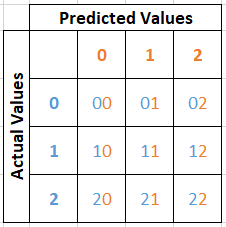

In [17]:
def my_3x3_confusion_matrix(true_values, predicted_values):
    """Returns a 3x3 confusion matrix based on the actual and predicted y values based on the prediction model. 
    The function will compare both values and assign it to the corresponding cell in the confusion matrix.
    Takes (true_values, predicted_values) as input."""

    # initiate blank matrix
    cm = [
        [0,0,0],
        [0,0,0],
        [0,0,0]
    ]

    # zip both actual and predicted y values so that we are able to easily compare both values
    for true_val, pred_val in zip(true_values, predicted_values):

        # increases count in the corresponding matrix cells depending on the prediction of the y values
        
        if true_val == 0: 
            if pred_val == 0:
                cm[0][0] += 1
            elif pred_val == 1:
                cm[0][1] += 1
            else:
                cm[0][2] += 1

        elif true_val == 1: 
            if pred_val == 0:
                cm[1][0] += 1
            elif pred_val == 1:
                cm[1][1] += 1
            else:
                cm[1][2] += 1

        else:
            if pred_val == 0:
                cm[2][0] += 1
            elif pred_val == 1:
                cm[2][1] += 1
            else:
                cm[2][2]+= 1
    
    return cm

In [18]:
cm = my_3x3_confusion_matrix(y_true, y_pred)
print(cm)

[[11, 0, 0], [2, 16, 0], [0, 0, 16]]


In [19]:
def conf_matrix(cm):
    """Turns the confusion matrix into a numpy array for better visualization. Takes (confusion_matrix) as input."""
    print("The calculated confusion matrix is:")
    print(np.array(cm))

def accuracy(true_pos, true_neg, false_pos, false_neg):
    """Calculates the accuracy of the prediction using the confusion matrix. 
    The accuracy is the ratio of correctly predicted values to the total number of values.
    It can be calculated by: (tp+tn)/(tp+tn+fp+fn). Takes (true_pos, true_neg, false_pos, false_neg) as input."""
    return ((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg))
 
def precision(true_val, false_val):
    """Calculates the precision of the prediction using the confusion matrix. 
    The precision is the ratio of correct positive predictions to the total predicted positive values.
    It can be calculated by: tp/(tp+fp). The negative precision can also be calculated by: tn/(tn+fn).
    Takes (true_val, false_val) as input."""
    return (true_val / (true_val + false_val))

def recall(true_val, false_val):
    """Calculates the recall value of the prediction using the confusion matrix. 
    The recall is the ratio of correct positive predictions to the total number of actual positive values.
    It can be calculated by: tp/(tp+fn). The negative recall can also be calculated by: tn/(tn+fp).
    Takes (true_val, false_val) as input."""
    return (true_val / (true_val + false_val))

def f1_score(precision, recall):
    """Calculates the F1 score of the prediction using the confusion matrix. 
    The F1 score is the weighted average of the precision and recall values, which considers the false positive and false negative outputs.
    It can be calculated with 2*(recall*precision)/(recall+precision). 
    Takes (precision, recall) as input."""
    return (2 * (precision * recall) / (precision + recall))

Adding up the True Positive, False Negative, True Negative and False Positive values for each of the 3 classes for easy calculation of Accuracy, Precision, Recall and F1 score.

In [20]:
def get_tp(cm):
    """Get all True positives. Takes Confusion Matrix as input"""
    tp = [0,0,0]
    for x in range(3):
        tp[x] = cm[x][x]
    return tp

In [21]:
def get_fn(cm):
    """Get all False negatives. Takes Confusion Matrix as input"""
    fn = [0,0,0]
    for x in range(3):
        fn[x] = cm[x][(x+1)%3] + cm[x][(x+2)%3]
    return fn

In [22]:
def get_tn(cm):
    """Get all True negatives. Takes Confusion Matrix as input"""
    tn = [0,0,0]
    for x in range(3):
        tn[x] = cm[(x+1)%3][(x+1)%3] + cm[(x+1)%3][(x+2)%3] + cm[(x+2)%3][(x+1)%3] + cm[(x+2)%3][(x+2)%3]
    return tn

In [23]:
def get_fp(cm):
    """Get all False positives. Takes Confusion Matrix as input"""
    fp = [0,0,0]
    for x in range(3):
        fp[x] = cm[(x+1)%3][x] + cm[(x+2)%3][x]
    return fp

In [24]:
# Gets all relevant values for each of the classes
class_tp = get_tp(cm)
class_fn = get_fn(cm)

class_tn = get_tn(cm)
class_fp = get_fp(cm)

Adds up the total values of each True Positive, False Negative, True Negative and False Positive calculated for each class, to calculate the overall Accuracy, Precision, Recall and F1 score.

In [25]:
# Gets the total relevant values for the entire data set
total_tp = sum(class_tp)
total_fn = sum(class_fn)

total_fp = sum(class_fp)
total_tn = sum(class_tn)

### Test evaluation code with own metric calculation code

In [26]:
conf_matrix(cm)

The calculated confusion matrix is:
[[11  0  0]
 [ 2 16  0]
 [ 0  0 16]]


In [27]:
# Calculating the overall Micro Accuracy, Precision, Recall and F1 score.

tot_acc = (total_tp/(total_tp+total_fn))
print("Calculated Total Accuracy Score:", round(tot_acc,3))

tot_prec = precision(total_tp, total_fp)
print("Calculated Micro Precision Score:", round(tot_prec,3))

tot_rec = recall(total_tp, total_fn)
print("Calculated Micro Recall Score:", round(tot_rec,3))

Calculated Total Accuracy Score: 0.956
Calculated Micro Precision Score: 0.956
Calculated Micro Recall Score: 0.956


Since Accuracy = Precision = Recall, the Micro F1 value is also equal to that value.

In [28]:
print(total_tp)
print(total_fn)
print(total_fp)
print(total_tn)

43
2
2
88


In [29]:
def get_class_acc(class_tp,class_fn,class_tn,class_fp):
    """Calculates the accuracy value of each of the 3 classes, and stores each answer in a list."""
    acc = [0,0,0]
    for x in range(3):
        acc[x] = accuracy(class_tp[x], class_tn[x], class_fp[x], class_fn[x])
    return acc

def get_class_prec(class_tp,class_fp):
    """Calculates the precision value of each of the 3 classes, and stores each answer in a list."""
    prec = [0,0,0]
    for x in range(3):
        prec[x] = precision(class_tp[x], class_fp[x])
    return prec

def get_class_rec(class_tp,class_fn):
    """Calculates the recall value of each of the 3 classes, and stores each answer in a list."""
    rec = [0,0,0]
    for x in range(3):
        rec[x] = recall(class_tp[x], class_fn[x])
    return rec

def get_class_f1(prec,rec):
    """Calculates the F1 score of each of the 3 classes, and stores each answer in a list."""
    f1 = [0,0,0]
    for x in range(3):
        f1[x] = f1_score(prec[x], rec[x])
    return f1

In [30]:
acc = get_class_acc(class_tp,class_fn,class_tn,class_fp)
prec = get_class_prec(class_tp,class_fp)
rec = get_class_rec(class_tp,class_fn)
f1 = get_class_f1(prec,rec)

In [31]:
# Calculate the overall Macro scores using the individual class Accuracy, Precision, Recall and F1 scores

macro_prec = ((prec[0] + prec[1] + prec[2]) / 3)
print("Calculated Macro Precision Score:", round(macro_prec,3))

macro_rec = ((rec[0] + rec[1] + rec[2]) / 3)
print("Calculated Macro Recall Score:", round(macro_rec,3))

macro_f1 = ((f1[0] + f1[1] + f1[2]) / 3)
print("Calculated Macro F1 Score:", round(macro_f1,3))

Calculated Macro Precision Score: 0.949
Calculated Macro Recall Score: 0.963
Calculated Macro F1 Score: 0.953


In [32]:
# Count the number of each class in the list of actual y values.

no_of_0s = np.count_nonzero(y_true==0)
print("Number of 0s:", no_of_0s)

no_of_1s = np.count_nonzero(y_true==1)
print("Number of 1s:", no_of_1s)

no_of_2s = np.count_nonzero(y_true==2)
print("Number of 2s:", no_of_2s)

total_vals = no_of_0s + no_of_1s + no_of_2s
print("Total number of values:", total_vals)

Number of 0s: 11
Number of 1s: 18
Number of 2s: 16
Total number of values: 45


In [33]:
# Calculate the weighted Accuracy, Precision, Recall and F1 scores.

weighted_prec =  ((prec[0]*no_of_0s + prec[1]*no_of_1s + prec[2]*no_of_2s) / total_vals) 
print("Calculated Weighted Precision Score:", round(weighted_prec,3))

weighted_rec =  ((rec[0]*11 + rec[1]*18 + rec[2]*16) / total_vals) 
print("Calculated Weighted Recall Score:", round(weighted_rec,3))
      
weighted_f1 = ((f1[0]*11 + f1[1]*18 + f1[2]*16) / total_vals) 
print("Calculated Weighted F1 Score:", round(weighted_f1,3))

Calculated Weighted Precision Score: 0.962
Calculated Weighted Recall Score: 0.956
Calculated Weighted F1 Score: 0.956


### Test evaluation code with sklearn.metrics

In [34]:
# import score functions from sci-kit learn library 

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [35]:
cm = confusion_matrix(y_true, y_pred)
print("The confusion matrix is:\n", cm)

The confusion matrix is:
 [[11  0  0]
 [ 2 16  0]
 [ 0  0 16]]


In [36]:
# Accuracy of the model calculated by sklearn
print("Accuracy:", round(accuracy_score(y_true,y_pred),3))

Accuracy: 0.956


In [37]:
# Micro metrics of the model calculated by sklearn
print("Micro Precision:", round(precision_score(y_true, y_pred, average='micro'),3))
print("Micro Recall:", round(recall_score(y_true, y_pred, average='micro'),3))
print("Micro F1-score:", round(f1_score(y_true, y_pred, average='micro'),3))

Micro Precision: 0.956
Micro Recall: 0.956
Micro F1-score: 0.956


In [38]:
# Macro metrics of the model calculated by sklearn
print("Macro Precision:", round(precision_score(y_true, y_pred, average='macro'),3))
print("Macro Recall:", round(recall_score(y_true, y_pred, average='macro'),3))
print("Macro F1-score:", round(f1_score(y_true, y_pred, average='macro'),3))

Macro Precision: 0.949
Macro Recall: 0.963
Macro F1-score: 0.953


In [39]:
# Weighted metrics of the model calculated by sklearn
print("Weighted Precision:", round(precision_score(y_true, y_pred, average='weighted'),3))
print("Weighted Recall:", round(recall_score(y_true, y_pred, average='weighted'),3))
print("Weighted F1-score:", round(f1_score(y_true, y_pred, average='weighted'),3))

Weighted Precision: 0.962
Weighted Recall: 0.956
Weighted F1-score: 0.956


The results of the self-calculated micro, macro and weighted precision, recall, and f1-scores are equivalent to the micro, macro and weighted precision, recall, and f1-scores as calculated by the sci-kit learn library. 

## 4. Nested Cross-validation using your implementation of KNN
In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes.

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, `list(range(1,11)` evaluates the neighbour parameter from 1 to 10, and `['euclidean','manhattan',...]` evaluates the distances on the validation sets. mySeed is simply a random seed to enable us to replicate your results.

**Notes:**

- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate at least two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
    - the accuracy per distinct set of parameters on the validation set
    - the best set of parameters for the fold after validation
    - the confusion matrix per fold (on the testing set)

Implementation of the distance metrics and checking to verify that the calculation was done correctly.

In [40]:
from scipy.spatial import distance

In [41]:
print(calc_eucl_dist(X[0], X[32]))
print(distance.euclidean(X[0], X[32]))

1.919453047094406
1.919453047094406


In [42]:
def calc_manh_dist(row1,row2):
    """Calculates the straight line distance between two vectors using the Manhattan distance method, which in this case is calculating the distance between two rows in a dataset.
    Takes (row1, row2) as input, which are two vectors."""
    
    # initiate a variable to store the distance 
    dist = 0.0
    for i in range(len(row1)):
        dist += abs(row1[i]-row2[i])
    return dist

In [43]:
print(calc_manh_dist(X[0], X[32]))
print(distance.cityblock(X[0], X[32]))

2.790000000000001
2.790000000000001


In [44]:
def calc_cheby_dist(row1,row2):
    """Calculates the straight line distance between two vectors using the Chebyshev distance method, which in this case is calculating the distance between two rows in a dataset.
    Takes (row1, row2) as input, which are two vectors."""
    
    # initiate a list to store the distance to select the max
    dist = []
    for i in range(len(row1)):
        dist.append(abs(row1[i]-row2[i]))
    return max(dist)

In [45]:
print(calc_cheby_dist(X[0], X[32]))
print(distance.chebyshev(X[0], X[32]))

1.7999999999999998
1.7999999999999998


In [46]:
X_copy = X.copy()
y_copy = y.copy()

XN_copy = XN.copy()

In [47]:
def join(x,y):
    new_arr = []
    for i in range(len(y)):    
        new_row = np.append(x[i],y[i])
        new_arr.append(new_row)
    return new_arr

In [48]:
new_dataset = join(X,y)
new_dataset[0]

array([14.23,  3.06,  5.64,  2.43,  0.  ])

In [49]:
print(len(X_copy))
print(len(y_copy))
print(len(XN_copy))
print(len(new_dataset))

178
178
178
178


Visualization of the nested cross validation division of the datasets

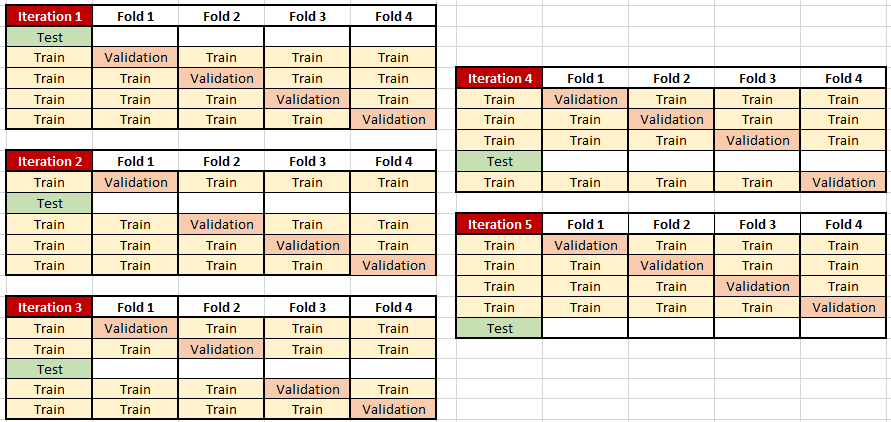

In [50]:
def split_dataset_into_n_iterations(X,n):
    
    train_arrays = []
    test_arrays = []
    
    for loop in range(n):
        train_array=[]
        test_array=[]
        
        for index in range(len(X)):       
        
            if (index % n == loop):
                test_array.append(X[index])
            else:
                train_array.append(X[index])
                
        train_arrays.append(train_array)
        test_arrays.append(test_array)
            
    return train_arrays, test_arrays

Verifying that the split function works

In [51]:
dataset_of_5_iterations = split_dataset_into_n_iterations(new_dataset,5)

In [52]:
print("Length should contain train_array and test_array:",len(dataset_of_5_iterations))
print("Train array should contain 5 iterations:",len(dataset_of_5_iterations[0]))
print("Test array should contain 5 iterations:",len(dataset_of_5_iterations[1]))
print("Train array iteration should contain 142/143 samples:",len(dataset_of_5_iterations[0][0]))
print("Test array iteration should contain 35/36 samples:",len(dataset_of_5_iterations[1][0]))

Length should contain train_array and test_array: 2
Train array should contain 5 iterations: 5
Test array should contain 5 iterations: 5
Train array iteration should contain 142/143 samples: 142
Test array iteration should contain 35/36 samples: 36


In [53]:
split_each_iteration_into_4_folds = split_dataset_into_n_iterations(dataset_of_5_iterations[0][0],4)

In [54]:
print("Length should contain train_array and test_array:",len(split_each_iteration_into_4_folds))
print("Each iteration in Train array should contain 4 folds:",len(split_each_iteration_into_4_folds[0]))
print("Each iteration in Validation array should contain 4 folds:",len(split_each_iteration_into_4_folds[1]))
print("Train array fold should contain 106/107 samples:",len(split_each_iteration_into_4_folds[0][0]))
print("Validation array fold should contain 35/36 samples:",len(split_each_iteration_into_4_folds[1][0]))

Length should contain train_array and test_array: 2
Each iteration in Train array should contain 4 folds: 4
Each iteration in Validation array should contain 4 folds: 4
Train array fold should contain 106/107 samples: 106
Validation array fold should contain 35/36 samples: 36


## 4. Nested Cross-validation using your implementation of KNN
In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes.

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, `list(range(1,11)` evaluates the neighbour parameter from 1 to 10, and `['euclidean','manhattan',...]` evaluates the distances on the validation sets. mySeed is simply a random seed to enable us to replicate your results.

**Notes:**

- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate at least two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
    - the accuracy per distinct set of parameters on the validation set
    - the best set of parameters for the fold after validation
    - the confusion matrix per fold (on the testing set)

In [55]:
def split_x_y(array):
    x_array = []
    y_array = []
    
    for row in range(len(array)):
        y_array.append(array[row][-1])
        x_array.append(array[row][:-1])
        
    return x_array, y_array

In [56]:
def myNestedCrossVal(x_list,y_list,n_folds,neighbour_parameter,distance_measure,seed):
    
    dataset = join(x_list,y_list)
    
    np.random.seed(seed)
    np.random.shuffle(dataset)
    
    # split dataset into n iterations 
    n_iterations = split_dataset_into_n_iterations(new_dataset,n_folds) # 0 is train array, 1 is test array

    ################################################################################
    outer_train_arrays = n_iterations[0] # will have n different train arrays
    
    outer_test_arrays = n_iterations[1] # will have n different test arrays
    
    ################################################################################
    # split each train array into n-1 folds
    total_m_folds = [] # n iterations of n-1 folds
    for x in range(len(outer_train_arrays)): #5
        m_folds = split_dataset_into_n_iterations(outer_train_arrays[0],n_folds-1) # 0 is train array, 1 is test array
        total_m_folds.append(m_folds)    
    
    ################################################################################
    # will hold all inner train arrays for all n iterations
    inner_train_arrays = []
    
    for train_arr in range(len(total_m_folds)): # n iterations of n-1 folds #4
        inner_train_arrays.append(total_m_folds[train_arr][0]) # 0 is train array, 1 is test array
        
    ################################################################################
    # will hold all inner train arrays for all 5 iterations
    inner_validation_arrays = []
    
    for validation_arr in range(len(total_m_folds)): # n iterations of n-1 folds #4
        inner_validation_arrays.append(total_m_folds[validation_arr][1]) # 0 is train array, 1 is test array # 4 folds
    
    # split validation array into x and y
    inner_validation_arrays_x = []
    inner_validation_arrays_y = []
          
    for each_itr in range(len(inner_validation_arrays)): #n #5
        for each_fold in range(len(inner_validation_arrays[each_itr])): #n-1 #4
            split_inner_validation = split_x_y(inner_validation_arrays[each_itr][each_fold])
            inner_validation_arrays_x.append(split_inner_validation[0])
            inner_validation_arrays_y.append(split_inner_validation[1])        

    ################################################################################
    total_acc_neighbours = []
    
    for j in range(len(neighbour_parameter)): 
        
        total_accuracy = []


        for each_itr in range(len(outer_train_arrays)): #n #5
            y_accuracy = []

            for each_fold in range(len(inner_train_arrays[each_itr])): #n-1 #4
                y_fold_indiv_eucl = []
                y_fold_indiv_manh = []
                y_fold_indiv_cheby = []

                y_preds_fold_eucl = []
                y_preds_fold_manh = []
                y_preds_fold_cheby = []     

                for each_row in range(len(inner_validation_arrays[each_itr][each_fold])): #size of fold #36
                    y_preds_row = []
                    y_preds_row_eucl = []
                    y_preds_row_manh = []
                    y_preds_row_cheby = []

                    for k in range(len(distance_measure)):
                        y_pred_indiv = myKNN(inner_train_arrays[each_itr][each_fold],inner_validation_arrays[each_itr][each_fold][each_row],(j+1),distance_measure[k])               
                        y_preds_row.append(y_pred_indiv)

                    y_preds_fold_eucl.append(y_preds_row[0]) #36
                    y_preds_fold_manh.append(y_preds_row[1])
                    y_preds_fold_cheby.append(y_preds_row[2])
                
                y_fold_indiv_eucl.extend( [round(check_accuracy(inner_validation_arrays_y[each_fold],y_preds_fold_eucl),4) , "Dist type: Eucl", "Itr #" + str(each_itr), "Fold #" + str(each_fold), "No. of neighbours: " + str(neighbour_parameter[j]), "Confusion Matrix:", str([my_3x3_confusion_matrix(inner_validation_arrays_y[each_fold],y_preds_fold_eucl)] )]) 
                y_fold_indiv_manh.extend( [round(check_accuracy(inner_validation_arrays_y[each_fold],y_preds_fold_manh),4) , "Dist type: Manh", "Itr #" + str(each_itr), "Fold #"+ str(each_fold), "No. of neighbours: " + str(neighbour_parameter[j]), "Confusion Matrix:", str([my_3x3_confusion_matrix(inner_validation_arrays_y[each_fold],y_preds_fold_manh)] )])
                y_fold_indiv_cheby.extend( [round(check_accuracy(inner_validation_arrays_y[each_fold],y_preds_fold_cheby),4) , "Dist type: Cheby", "Itr #" + str(each_itr), "Fold #"+ str(each_fold), "No. of neighbours: " + str(neighbour_parameter[j]), "Confusion Matrix:",str([my_3x3_confusion_matrix(inner_validation_arrays_y[each_fold],y_preds_fold_cheby)]) ])

                y_accuracy.extend( [y_fold_indiv_eucl, y_fold_indiv_manh, y_fold_indiv_cheby] )
            
            for a in range(len(y_accuracy)):
                total_accuracy.append(y_accuracy[a])
                
        for b in range(len(total_accuracy)):
            total_acc_neighbours.append(total_accuracy[b])
            total_acc_neighbours.sort(reverse=True)

    return (total_acc_neighbours)


In [57]:
# Test data code X:
test_x = myNestedCrossVal(X_copy,y_copy,5,[5],["eucl","manh","cheby"],4562)

test_x

[[100.0,
  'Dist type: Eucl',
  'Itr #4',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Eucl',
  'Itr #3',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Eucl',
  'Itr #2',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Eucl',
  'Itr #1',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Eucl',
  'Itr #0',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Cheby',
  'Itr #4',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[12, 0, 0], [0, 14, 0], [0, 0, 10]]]'],
 [100.0,
  'Dist type: Cheby',
  'Itr #3',
  'Fold #1',
  'No. of neighbours: 5',
  'Confusion Matrix:',


In [58]:
# Clean data code X:
clean_x = myNestedCrossVal(X_copy,y_copy,5,[1,2,3,4,5,6,7,8,9,10],["eucl","manh","cheby"],4562)

clean_x

[[100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 9',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 8',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 7',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 10',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #3',
  'Fold #3',
  'No. of neighbours: 9',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #3',
  'Fold #3',
  'No. of neighbours: 8',
  'Confusion Matrix:',
  '[[[1

In [59]:
noisy_x = myNestedCrossVal(XN_copy,y_copy,5,[1,2,3,4,5,6,7,8,9,10],["eucl","manh","cheby"],4562)

noisy_x

[[100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 9',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 8',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 7',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 5',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #4',
  'Fold #3',
  'No. of neighbours: 10',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #3',
  'Fold #3',
  'No. of neighbours: 9',
  'Confusion Matrix:',
  '[[[11, 0, 0], [0, 15, 0], [0, 0, 9]]]'],
 [100.0,
  'Dist type: Manh',
  'Itr #3',
  'Fold #3',
  'No. of neighbours: 8',
  'Confusion Matrix:',
  '[[[1

# 5. Summary of results

Using your result from above, fill out the following table using the **clean** data:

|Fold|Accuracy|k|Distance|
|---|---|---|---|
|1|100|9|Manhattan|
|2|100|9|Manhattan|
|3|100|9|Manhattan|
|4|100|9|Manhattan|
|5|100|9|Manhattan|
|total|100 ± 0|

Where **total** is given as an average over all the folds, and ± the standard deviation.

Now fill out the following table using the **noisy** data:

|Fold|Accuracy|k|Distance|
|---|---|---|---|
|1|100|9|Manhattan|
|2|100|9|Manhattan|
|3|100|9|Manhattan|
|4|100|9|Manhattan|
|5|100|9|Manhattan|
|total|100 ± 0|

### 5.2. Confusion matrix summary
Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your `myNestedCrossVal` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall.

In [60]:
def convert_to_int(arr):
    """Returns a single integer from a list of extracted characters"""
    new = []
    new_str = ''
    for x in arr:
        try:
            new.append(int(x))
        except ValueError:
            pass
    for y in new:
        new_str = new_str + str(y)
    return int(new_str)

In [61]:
def extract_num_from_str(string1):
    """Returns a list of 9 elements, corresponding to the 9 cells in a cm"""
    #converting string1 into a list of strings
    string1=string1.split()
    #applying list method to the individual elements of the list string1
    list1=list(map(list,string1))
    #returning the resultant list of lists
    return list1

In [62]:
def total_cm_from_x(x):
    """Returns each confusion matrix in a list format"""
    total_row = []
    for row in x:
        new_row = extract_num_from_str(row[6][2:-2]) # returns a list of len 9
        updated_row = []
        for y in range(len(new_row)):
            c = convert_to_int(new_row[y])
            updated_row.append(c)
        total_row.append(updated_row)
    return total_row

In [63]:
def total_cm_added_up(arr_x):
    clean_cm = [[0,0,0],[0,0,0],[0,0,0]]
    arr_x = total_cm_from_x(arr_x)
    for x in range(len(arr_x)):
        cm = arr_x[x]
        clean_cm[0][0] = clean_cm[0][0] + cm[0]
        clean_cm[0][1] = clean_cm[0][1] + cm[1]
        clean_cm[0][2] = clean_cm[0][2] + cm[2]
        clean_cm[1][0] = clean_cm[1][0] + cm[3]
        clean_cm[1][1] = clean_cm[1][1] + cm[4]
        clean_cm[1][2] = clean_cm[1][2] + cm[5]
        clean_cm[2][0] = clean_cm[1][0] + cm[6]
        clean_cm[2][1] = clean_cm[1][1] + cm[7]
        clean_cm[2][1] = clean_cm[1][2] + cm[8]

    return conf_matrix(clean_cm)

The calculated confusion matrix of all predictions of y from the clean dataset is as follows:

In [64]:
total_cm_added_up(clean_x)

The calculated confusion matrix is:
[[6945  105    0]
 [1245 7075  230]
 [1245  239    0]]


The calculated confusion matrix of all predictions of y from the noisy dataset is as follows:

In [65]:
total_cm_added_up(noisy_x)

The calculated confusion matrix is:
[[6945  105    0]
 [1245 7075  230]
 [1245  239    0]]
